In [1]:
import pandas as pd
import tensorflow as tf

2023-01-03 15:21:05.618253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Linear Regression
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

dftrain

sex   age  n_siblings_spouses  parch     fare   class     deck  \
0      male  22.0                   1      0   7.2500   Third  unknown   
1    female  38.0                   1      0  71.2833   First        C   
2    female  26.0                   0      0   7.9250   Third  unknown   
3    female  35.0                   1      0  53.1000   First        C   
4      male  28.0                   0      0   8.4583   Third  unknown   
..      ...   ...                 ...    ...      ...     ...      ...   
622    male  28.0                   0      0  10.5000  Second  unknown   
623    male  25.0                   0      0   7.0500   Third  unknown   
624  female  19.0                   0      0  30.0000   First        B   
625  female  28.0                   1      2  23.4500   Third  unknown   
626    male  32.0                   0      0   7.7500   Third  unknown   

     embark_town alone  
0    Southampton     n  
1      Cherbourg     n  
2    Southampton     y  
3    Southampton     n  
4     Queenstown     y  
..           ...   ...  
622  Southampton     y  
623  Southampton     y  
624  Southampton     y  
625  Southampton     n  
626   Queenstown     y  

[627 rows x 9 columns]

<AxesSubplot:>

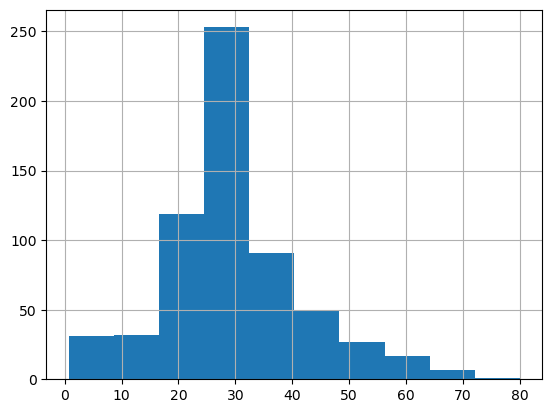

In [17]:
dftrain.age.hist()

<AxesSubplot:>

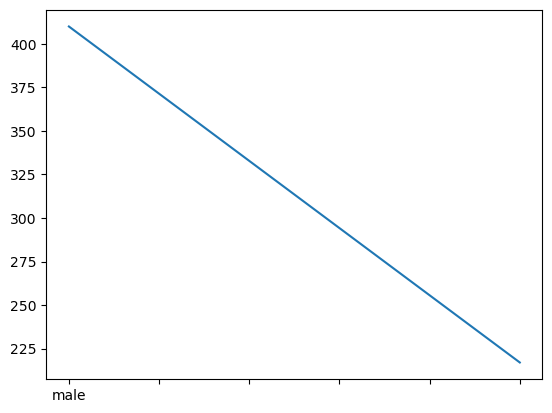

In [4]:
dftrain.sex.value_counts().plot()

In [5]:
CATIGORICAL_COLUMNS = ['sex', 'class', 'deck', 'embark_town', 'alone']

NUMERICAL_COLUMNS = ['age', 'n_siblings_spouses', 'parch', 'fare']

feature_column = []

# Using TensorFlow to clean the data for easier processing later
for val in CATIGORICAL_COLUMNS:
    vocab = dftrain[val].unique()
    feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(val, vocab))
    
for feature in NUMERICAL_COLUMNS:
    feature_column.append(tf.feature_column.numeric_column(feature, dtype=tf.float32))

    
# feature_column

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='parch', shape=(1,)

In [26]:
def make_input(data, label, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data), label))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function


In [27]:
train_input_fn = make_input(dftrain, y_train)
eval_input_fn = make_input(dfeval, y_eval, batch_size=1, shuffle=False)

In [28]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_column)
# linear_est

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/f_/0f3gmdgs0db0f5gf8gg2874c0000gn/T/tmpbkqd4rei', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
linear_est.train(train_input_fn)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.


2023-01-03 15:55:36.613718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 15:55:36.666687: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/f_/0f3gmdgs0db0f5gf8gg2874c0000gn/T/tmpbkqd4rei/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 340.184
INFO:tensorflow:loss = 0.428667, step = 100 (0.295 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into /var/folders/f_/0f3gmdgs0db0f5gf8gg2874c0000gn/T/tmpbkqd4rei/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
INFO:tensorflow:Loss for final step: 0.23797329.


In [30]:
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-01-03T15:55:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/f_/0f3gmdgs0db0f5gf8gg2874c0000gn/T/tmpbkqd4rei/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 2.19167s
INFO:tensorflow:Finished evaluation at 2023-01-03-15:56:01
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7689394, accuracy_baseline = 0.625, auc = 0.8164677, auc_precision_recall = 0.7660003, average_loss = 0.53220326, global_step = 200, label/mean = 0.375, loss = 0.53220326, precision = 0.75, prediction/mean = 0.27729324, recall = 0.57575756
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /var/folders/f_/0f3gmdgs0db0f5gf8gg2874c0000gn/T/tmpbkqd4rei/model.ckpt-200


In [31]:
result

{'accuracy': 0.7689394,
 'accuracy_baseline': 0.625,
 'auc': 0.8164677,
 'auc_precision_recall': 0.7660003,
 'average_loss': 0.53220326,
 'label/mean': 0.375,
 'loss': 0.53220326,
 'precision': 0.75,
 'prediction/mean': 0.27729324,
 'recall': 0.57575756,
 'global_step': 200}